<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20021_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Derivation of Mode Shapes and Linear Operator for Pinned-Free Beam

### 1. Boundary Conditions – Pinned-Free Beam

Consider a uniform beam of length $L$ with the following support conditions:

- **Pinned end (x = 0):**
  - Displacement is fixed: $w(0,t) = 0$
  - Bending moment is zero: $EI \frac{\partial^2 w}{\partial x^2}(0,t) = 0$  ⇒  $w''(0,t) = 0$

- **Free end (x = L):**
  - Bending moment is zero: $w''(L,t) = 0$
  - Shear force is zero: $EI \frac{\partial^3 w}{\partial x^3}(L,t) = 0$  ⇒  $w'''(L,t) = 0$

### 2. Governing Equation and Linear Operator

The equation of motion for free transverse vibration (no axial load) is:

$$
\rho A \frac{\partial^2 w}{\partial t^2} + EI \frac{\partial^4 w}{\partial x^4} = q(x,t)
$$

For free vibration ($q = 0$), we define the spatial differential operator $H$ as:

$$
H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}
$$

This gives the compact form:

$$
\frac{\partial^2 w}{\partial t^2} + H w = 0
$$

### 3. Separation of Variables – Eigenvalue Problem

Assume a time-harmonic solution:

$$
w(x,t) = \phi(x) \, e^{i\omega t}
$$

Substituting yields the eigenvalue problem:

$$
H \phi = \omega^2 \phi \quad \text{or} \quad \frac{d^4 \phi}{dx^4} = \beta^4 \phi
$$

where we introduced the wavenumber parameter:

$$
\beta^4 = \frac{\rho A \omega^2}{EI} \qquad \Rightarrow \qquad \omega = \beta^2 \sqrt{\frac{EI}{\rho A}}
$$

The general solution is:

$$
\phi(x) = A \sin(\beta x) + B \cos(\beta x) + C \sinh(\beta x) + D \cosh(\beta x)
$$

### 4. Applying Pinned Boundary Conditions (x = 0)

1. $\phi(0) = 0$  
   $\implies B + D = 0 \quad \Rightarrow \quad D = -B$

2. $\phi''(0) = 0$  
   $\phi''(x) = \beta^2 \bigl(-A\sin(\beta x) - B\cos(\beta x) + C\sinh(\beta x) + D\cosh(\beta x)\bigr)$  
   $\phi''(0) = \beta^2 (-B + D) = 0 \quad \Rightarrow \quad -B - B = 0 \quad \Rightarrow \quad B = 0$  
   $\Rightarrow D = 0$

Thus the mode shape reduces to:

$$
\phi(x) = A \sin(\beta x) + C \sinh(\beta x)
$$

### 5. Free-end Conditions (x = L) → Frequency Equation

Apply the two conditions at $x = L$:

**a) Zero moment:**

$$
\phi''(L) = \beta^2 \bigl( -A \sin(\beta L) + C \sinh(\beta L) \bigr) = 0
$$

$$
A \sin(\beta L) = C \sinh(\beta L) \quad \Rightarrow \quad C = A \frac{\sin(\beta L)}{\sinh(\beta L)}
$$

**b) Zero shear:**

$$
\phi'''(L) = \beta^3 \bigl( -A \cos(\beta L) + C \cosh(\beta L) \bigr) = 0
$$

Substitute $C$:

$$
-A \cos(\beta L) + A \frac{\sin(\beta L)}{\sinh(\beta L)} \cosh(\beta L) = 0
$$

$$
\cos(\beta L) = \frac{\sin(\beta L) \cosh(\beta L)}{\sinh(\beta L)}
$$

Rearranging gives the well-known **characteristic equation** for the pinned-free beam:

$$
\tan(\beta L) = \tanh(\beta L)
$$

### 6. Mode Shape Expression

The $k$-th eigenfunction (mode shape) can be written as:

$$
\phi_k(x) = \sin(\beta_k x) + \frac{\sin(\beta_k L)}{\sinh(\beta_k L)} \sinh(\beta_k x)
$$

(Amplitude scaling factor is arbitrary and usually normalized later according to mass or other criteria.)

### 7. First Few Roots (approximate values of $\beta_k L$)

- Mode 1: $\beta_1 L \approx 3.9266$
- Mode 2: $\beta_2 L \approx 7.0686$
- Mode 3: $\beta_3 L \approx 10.2102$
- (Higher modes approach $(2k-1)\pi/2$)

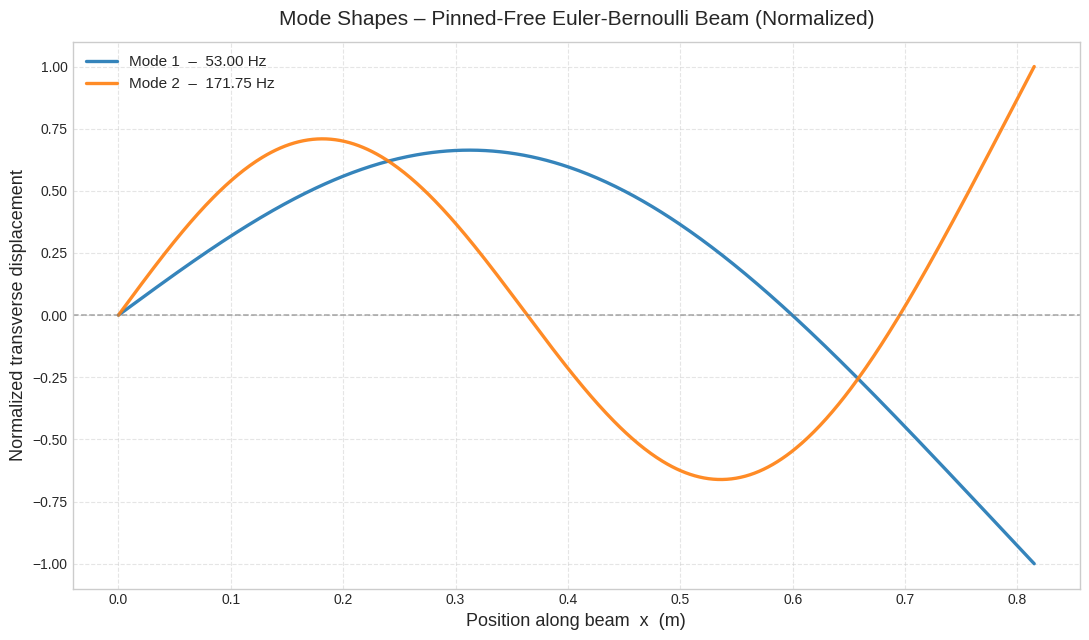


Computed eigenvalues (βₖ L) and natural frequencies:
───────────────────────────────────────────────
Mode  1 :   βL =   3.9266    →    f =  53.00 Hz
Mode  2 :   βL =   7.0686    →    f = 171.75 Hz


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ─── 1. Beam Physical & Geometric Properties ────────────────────────────────
length          = 0.815          # total length [m]
total_mass      = 1.65           # total mass [kg]
young_modulus   = 2.0e11         # E [Pa]
width           = 0.025          # b [m]
thickness       = 0.010          # h [m]

cross_section_area = width * thickness
moment_of_inertia  = (width * thickness**3) / 12
mass_per_unit_length = total_mass / length
flexural_rigidity = young_modulus * moment_of_inertia   # EI

# ─── 2. Characteristic Equation for Pinned-Free Beam ────────────────────────
def pinned_free_freq_eq(lam):
    """ Characteristic function: sin(λ)cosh(λ) − cos(λ)sinh(λ) = 0 """
    return np.sin(lam) * np.cosh(lam) - np.cos(lam) * np.sinh(lam)

# ─── 3. Locate first n eigenvalues (βL values) ──────────────────────────────
def locate_eigenvalues(num_modes=2):
    eigenvalues = []
    # Coarse search grid to find sign-change intervals
    grid = np.linspace(0.5, 15.0, 1200)
    f_vals = pinned_free_freq_eq(grid)

    for i in range(len(grid)-1):
        if f_vals[i] * f_vals[i+1] < 0:           # sign change
            root = brentq(pinned_free_freq_eq, grid[i], grid[i+1])
            eigenvalues.append(root)
            if len(eigenvalues) >= num_modes:
                break

    return np.array(eigenvalues)

lambda_values = locate_eigenvalues(2)

# ─── 4. Mode shape function (arbitrary amplitude) ───────────────────────────
def mode_shape_function(x, lambda_k, L):
    beta = lambda_k / L
    # From moment condition at free end:  σ = sin(βL) / sinh(βL)
    ratio = np.sin(lambda_k) / np.sinh(lambda_k)
    return np.sin(beta * x) + ratio * np.sinh(beta * x)

# ─── 5. Generate plots ──────────────────────────────────────────────────────
x_points = np.linspace(0, length, 600)

plt.figure(figsize=(11, 6.5))
plt.style.use('seaborn-v0_8-whitegrid')   # optional: cleaner look

for mode_idx, lam in enumerate(lambda_values, start=1):
    psi_raw = mode_shape_function(x_points, lam, length)

    # Normalize: peak absolute value = 1
    psi_norm = psi_raw / np.max(np.abs(psi_raw))

    # Natural frequency
    beta = lam / length
    omega_rad = beta**2 * np.sqrt(flexural_rigidity / mass_per_unit_length)
    f_hz = omega_rad / (2 * np.pi)

    plt.plot(x_points, psi_norm,
             label=f'Mode {mode_idx}  –  {f_hz:.2f} Hz',
             linewidth=2.4, alpha=0.9)

# ─── Plot cosmetics ─────────────────────────────────────────────────────────
plt.axhline(y=0, color='gray', lw=1.1, ls='--', alpha=0.7)
plt.title('Mode Shapes – Pinned-Free Euler-Bernoulli Beam (Normalized)',
          fontsize=15, pad=12)
plt.xlabel('Position along beam  x  (m)', fontsize=13)
plt.ylabel('Normalized transverse displacement', fontsize=13)
plt.legend(fontsize=11, loc='upper left', framealpha=0.95)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ─── Summary output ─────────────────────────────────────────────────────────
print("\nComputed eigenvalues (βₖ L) and natural frequencies:")
print("───────────────────────────────────────────────")
for k, lam in enumerate(lambda_values, 1):
    beta = lam / length
    omega = beta**2 * np.sqrt(flexural_rigidity / mass_per_unit_length)
    f = omega / (2 * np.pi)
    print(f"Mode {k:2d} :   βL = {lam:8.4f}    →    f = {f:6.2f} Hz")

# 2-DOF Modal Reduction of Pinned-Free Beam with Discrete Attachments


### 1. System Description & Key Parameters

We model a pinned-free Euler-Bernoulli beam (length $L = 0.815$ m) carrying three discrete elements:

**Beam properties**
- Length: $L = 0.815$ m  
- Total mass: $m_\text{beam} = 1.65$ kg  
- Cross-section: $b = 0.025$ m, $h = 0.010$ m  
- Young's modulus: $E = 200$ GPa  
- Second moment of area: $I = bh^3/12$  
- Flexural rigidity: $EI \approx 416.67$ N·m²  
- Mass per unit length: $\rho A = m_\text{beam}/L \approx 2.025$ kg/m

**Discrete attachments (lumped masses & stiffness)**
- Helical spring: stiffness $k_s = 3800$ N/m, attached at $x_s = 0.75$ m  
- Effective spring mass (1/3 of spring + connector): $m_{s,\text{eff}} = 0.1383$ kg  
- Electromagnetic exciter mass: $m_e = 4.2$ kg at $x_e = 0.40$ m  
- Damper + added mass: $m_d = 0.53$ kg at $x_d = 0.20$ m

### 2. Assumed Modal Expansion (Galerkin Approach)

We approximate the transverse displacement field using the **first two undamped mode shapes** of the bare pinned-free beam:

$$
y(x,t) \approx \psi_1(x)\, z_1(t) + \psi_2(x)\, z_2(t)
$$

where $\psi_k(x)$ are the normalized (or arbitrarily scaled) eigenfunctions satisfying the pinned-free boundary conditions and the characteristic equation $\tan(\beta_k L) = \tanh(\beta_k L)$.

### 3. Generalized (Modal) Mass Matrix

The $k$-th diagonal element of the modal mass matrix is obtained from the total kinetic energy:

$$
M_k = \underbrace{\int_0^L \rho A \, \psi_k^2(x) \, dx}_{\text{beam distributed}}
+ m_{s,\text{eff}} \, \psi_k^2(x_s)
+ m_e \, \psi_k^2(x_e)
+ m_d \, \psi_k^2(x_d)
$$

Because the bare-beam modes are orthogonal with respect to the distributed mass, the off-diagonal terms vanish and we obtain a **diagonal mass matrix**:

$$
\mathbf{M} = \operatorname{diag}(M_1, M_2)
$$

### 4. Generalized (Modal) Stiffness Matrix

The modal stiffness $K_k$ combines the beam's bending strain energy and the potential energy stored in the helical spring:

$$
K_k = \underbrace{\int_0^L EI \left( \frac{d^2 \psi_k}{dx^2} \right)^2 dx}_{\text{beam bending stiffness}}
+ k_s \, \psi_k^2(x_s)
$$

Using the free-vibration eigenvalue relation $EI \psi_k'''' = \rho A \omega_{k,\text{bare}}^2 \psi_k$ and integration by parts (with pinned-free BCs), the beam contribution simplifies to:

$$
\int_0^L EI (\psi_k'')^2 dx = \omega_{k,\text{bare}}^2 \int_0^L \rho A \psi_k^2 dx = \omega_{k,\text{bare}}^2 M_{k,\text{beam}}
$$

Thus the total modal stiffness becomes:

$$
K_k = \omega_{k,\text{bare}}^2 M_{k,\text{beam}} + k_s \psi_k^2(x_s)
$$

Again, the modal stiffness matrix is diagonal:

$$
\mathbf{K} = \operatorname{diag}(K_1, K_2)
$$

### 5. Decoupled Equations of Motion in Modal Coordinates

Applying the principle of virtual work (or Lagrange’s equations), the reduced-order model in modal space reads:

$$
\mathbf{M} \ddot{\mathbf{z}} + \mathbf{K} \mathbf{z} = \mathbf{Q}(t)
$$

with generalized force vector coming from the applied excitation force $F(t)$ at $x = x_e$:

$$
\mathbf{Q}(t) = F(t) \begin{Bmatrix} \psi_1(x_e) \\ \psi_2(x_e) \end{Bmatrix}
$$

Explicitly:

$$
\begin{aligned}
M_1 \ddot{z}_1 + K_1 z_1 &= F(t) \psi_1(x_e) \\
M_2 \ddot{z}_2 + K_2 z_2 &= F(t) \psi_2(x_e)
\end{aligned}
$$

### 6. Estimated Natural Frequencies of the Loaded System

The natural frequencies of the modified (loaded) system in each mode are approximated as:

$$
\omega_{n,k} = \sqrt{\frac{K_k}{M_k}}, \qquad f_{n,k} = \frac{\omega_{n,k}}{2\pi}
$$

These values will be higher than the bare-beam frequencies due to the added spring stiffness, but lower than a fully clamped system because of the large lumped masses.

---

**Next steps in notebook:**
- Compute numerical values of $\psi_1(x_e)$, $\psi_1(x_s)$, etc. using previously derived mode shapes
- Evaluate $M_1$, $M_2$, $K_1$, $K_2$
- Compare $f_{n,1}$ and $f_{n,2}$ with experimental / FE results
- Simulate time response to harmonic forcing

In [2]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ─── Beam & Material Properties ─────────────────────────────────────────────
beam_length     = 0.815               # L [m]
beam_total_mass = 1.65                # kg
linear_density  = beam_total_mass / beam_length   # ρA [kg/m]

youngs_modulus  = 2.0e11              # E [Pa]
width           = 0.025               # b [m]
height          = 0.010               # h [m]
area_moment     = (width * height**3) / 12       # I [m⁴]
flex_rigidity   = youngs_modulus * area_moment   # EI [N·m²]

# ─── Lumped Elements ────────────────────────────────────────────────────────
spring_stiffness    = 3800.0          # k_s [N/m]
spring_location     = 0.75            # x_s [m]
spring_eff_mass     = 0.1383          # m_s,eff [kg]

exciter_mass        = 4.2             # m_e [kg]
exciter_location    = 0.40            # x_e [m]

damper_mass         = 0.53            # m_d [kg]
damper_location     = 0.20            # x_d [m]

# ─── Characteristic Equation (Pinned-Free) ──────────────────────────────────
def char_eq_non_dim(lam):
    """ sin(λ)cosh(λ) - cos(λ)sinh(λ) = 0 """
    return np.sin(lam) * np.cosh(lam) - np.cos(lam) * np.sinh(lam)

# Find first two positive roots
scan_points = np.linspace(0.01, 13.0, 1400)
sign_changes = np.where(np.diff(np.sign(char_eq_non_dim(scan_points))) != 0)[0]

lambda_roots = []
for idx in sign_changes[:2]:  # take first two sign changes
    a, b = scan_points[idx], scan_points[idx+1]
    root = brentq(char_eq_non_dim, a, b)
    lambda_roots.append(root)

print(f"Found βL roots: {[f'{r:.4f}' for r in lambda_roots]}\n")

# ─── Mode Shape & Second Derivative ─────────────────────────────────────────
def mode_shape(x, lam, L):
    beta = lam / L
    coeff = np.sin(lam) / np.sinh(lam) if np.abs(np.sinh(lam)) > 1e-12 else 0.0
    return np.sin(beta * x) + coeff * np.sinh(beta * x)

def mode_shape_d2(x, lam, L):
    beta = lam / L
    coeff = np.sin(lam) / np.sinh(lam) if np.abs(np.sinh(lam)) > 1e-12 else 0.0
    return beta**2 * (-np.sin(beta * x) + coeff * np.sinh(beta * x))

# ─── Compute Modal Mass & Stiffness for each mode ───────────────────────────
modal_masses   = []
modal_stiff    = []

for lam_k in lambda_roots:
    # Beam distributed mass contribution
    beam_mass_int = quad(lambda x: linear_density * mode_shape(x, lam_k, beam_length)**2,
                         0, beam_length, limit=100)[0]

    # Lumped mass contributions
    point_masses = (
        spring_eff_mass * mode_shape(spring_location, lam_k, beam_length)**2 +
        exciter_mass    * mode_shape(exciter_location, lam_k, beam_length)**2 +
        damper_mass     * mode_shape(damper_location, lam_k, beam_length)**2
    )

    M_k = beam_mass_int + point_masses
    modal_masses.append(M_k)

    # Beam strain energy (bending)
    beam_stiff_int = quad(lambda x: flex_rigidity * mode_shape_d2(x, lam_k, beam_length)**2,
                          0, beam_length, limit=100)[0]

    # Spring potential energy
    spring_contrib = spring_stiffness * mode_shape(spring_location, lam_k, beam_length)**2

    K_k = beam_stiff_int + spring_contrib
    modal_stiff.append(K_k)

# Form diagonal matrices
M_modal = np.diag(modal_masses)
K_modal = np.diag(modal_stiff)

# Natural frequencies of the loaded system
omega_n = np.sqrt(np.diag(K_modal) / np.diag(M_modal))
f_n_hz  = omega_n / (2 * np.pi)

# ─── Display Results ────────────────────────────────────────────────────────
print("Modal Mass Matrix [kg]:")
print(np.round(M_modal, decimals=4))

print("\nModal Stiffness Matrix [N/m]:")
print(np.round(K_modal, decimals=1))

print("\nNatural Frequencies of Loaded Beam:")
for mode_num, freq in enumerate(f_n_hz, start=1):
    print(f"   Mode {mode_num:2d} →  {freq:6.2f} Hz")

Found βL roots: ['3.9266', '7.0686']

Modal Mass Matrix [kg]:
[[4.2735 0.    ]
 [0.     1.7822]]

Modal Stiffness Matrix [N/m]:
[[ 94998.5      0. ]
 [     0.  962230.7]]

Natural Frequencies of Loaded Beam:
   Mode  1 →   23.73 Hz
   Mode  2 →  116.94 Hz


## Rigid-Body Approximation for the Dominant Low-Frequency Mode (1-DOF Model)

### 1. Why the Flexural Modes May Not Capture the True First Mode

The classical Euler-Bernoulli modal analysis gives elastic bending modes. However, in this experimental setup — with a heavy exciter mass, a relatively soft spring near the free end, and a pinned support — the **lowest-frequency mode** tends to behave more like a **rigid-body rotation** about the pinned end rather than significant beam bending.  

To better approximate this pendulum-like “rocking” or “swinging” motion, we treat the beam as a rigid bar pivoting at x = 0.

### 2. Equivalent 1-DOF Rotational Model

We introduce a single generalized coordinate: the small angular rotation θ(t) of the entire beam (rigid-body assumption).

**Total moment of inertia about the pivot (x = 0):**

$$
J_0 = \frac{1}{3} m_\text{beam} L^2 + m_{s,\text{eff}} \, l_s^2 + m_e \, l_e^2 + m_d \, l_d^2
$$

- The $\frac{1}{3} m L^2$ term is the rotational inertia of a uniform rod about one end.  
- All lumped masses contribute $m \, r^2$ terms according to their distance from the pin.

**Restoring (rotational) stiffness from the spring:**

For small angles, the vertical displacement at the spring location is approximately $l_s \theta$.  
The spring force is $k_s (l_s \theta)$, and the resulting torque about the pivot is $k_s l_s \theta \cdot l_s$.

Thus:

$$
K_\theta = k_s \, l_s^2
$$

### 3. Equation of Motion

Applying the angular form of Newton’s second law about the pinned support:

$$
J_0 \, \ddot{\theta} + K_\theta \, \theta = \tau_\text{ext}(t)
$$

where the external torque comes from the excitation force $F(t)$ applied at distance $l_e$:

$$
\tau_\text{ext}(t) = F(t) \, l_e
$$

Substituting the expressions:

$$
\left( \frac{1}{3} m_\text{beam} L^2 + m_{s,\text{eff}} l_s^2 + m_e l_e^2 + m_d l_d^2 \right) \ddot{\theta}
+ k_s l_s^2 \, \theta = F(t) \, l_e
$$

### 4. Estimated Natural Frequency (Rigid-Body Approximation)

The undamped natural frequency of this equivalent 1-DOF torsional oscillator is:

$$
\omega_{n,\text{rigid}} = \sqrt{\frac{K_\theta}{J_0}} = \sqrt{\frac{k_s l_s^2}{J_0}} \quad \text{(rad/s)}
$$

$$
f_{n,\text{rigid}} = \frac{1}{2\pi} \sqrt{\frac{k_s l_s^2}{J_0}} \quad \text{(Hz)}
$$

This 1-DOF approximation provides a more accurate estimate of the lower-frequency "swinging" mode that the pure flexural model may miss or over-stiffen.



/tmp/ipython-input-78828889.py:80: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


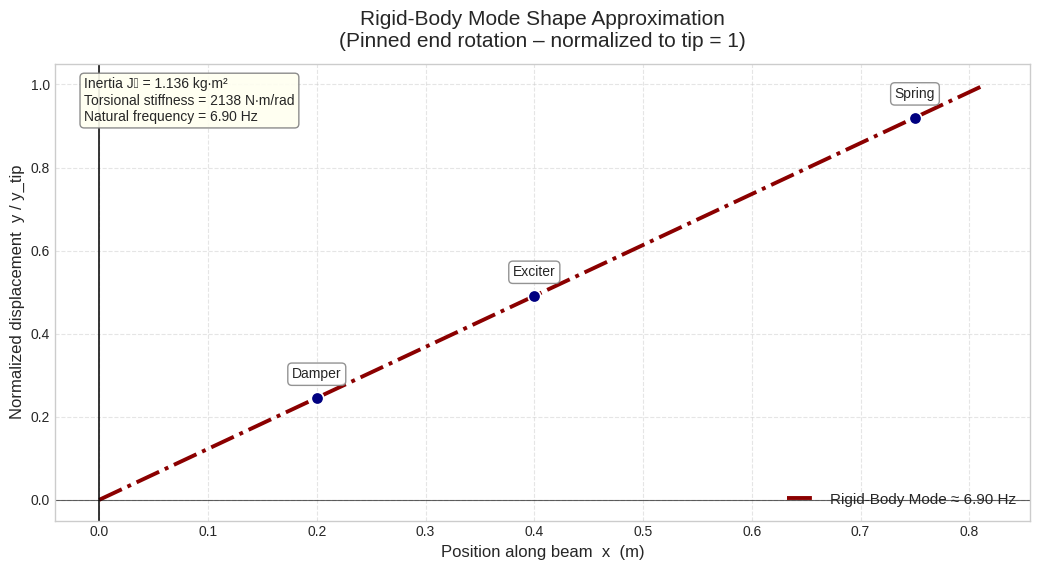

Rigid-Body 1-DOF Approximation Results
──────────────────────────────────────
  Pivot inertia (J₀)       :   1.1363 kg·m²
  Torsional stiffness      :   2137.5 N·m/rad
  Natural frequency        :     6.90 Hz


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ─── Physical & Geometric Parameters ────────────────────────────────────────
beam_length         = 0.815          # L [m]
beam_mass           = 1.65           # total beam mass [kg]
spring_stiff        = 3800.0         # k_s [N/m]
spring_pos          = 0.75           # x_s [m]

# Lumped masses & locations
m_spring_eff        = 0.1383         # effective spring mass [kg]
m_exciter           = 4.2            # exciter mass [kg]
m_damper            = 0.53           # damper mass [kg]

x_exciter           = 0.40           # exciter location [m]
x_damper            = 0.20           # damper location [m]

# ─── Rigid-Body Model Calculations ──────────────────────────────────────────
# Moment of inertia about pinned end (x=0)
# Uniform rod: (1/3) m L² + Σ m_i r_i²
inertia_pivot = (
    (1.0 / 3.0) * beam_mass * beam_length**2 +
    m_spring_eff * spring_pos**2 +
    m_exciter    * x_exciter**2 +
    m_damper     * x_damper**2
)

# Torsional stiffness from spring (small-angle: torque = k_s * (l_s θ) * l_s)
torsional_stiffness = spring_stiff * spring_pos**2

# Undamped natural frequency
omega_n_rad = np.sqrt(torsional_stiffness / inertia_pivot)
f_n_hz      = omega_n_rad / (2.0 * np.pi)

# ─── Rigid-Body Mode Shape (linear displacement) ────────────────────────────
x = np.linspace(0, beam_length, 200)

# For pure rigid rotation about x=0, displacement y(x) = θ · x
# Normalized so tip displacement = 1 → y_norm(x) = x / L
y_norm = x / beam_length

# ─── Plotting ───────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10.5, 5.8))

ax.plot(x, y_norm,
        color='darkred', lw=2.8, ls='-.',
        label=f'Rigid-Body Mode ≈ {f_n_hz:.2f} Hz')

# Mark attachment points with small circles + labels
attachments = [
    (x_damper,  x_damper/beam_length,  'Damper',   (0, 12)),
    (x_exciter, x_exciter/beam_length, 'Exciter',  (0, 12)),
    (spring_pos, spring_pos/beam_length, 'Spring', (0, 12))
]

for pos, yval, label, offset in attachments:
    ax.scatter(pos, yval, s=80, color='navy', zorder=10, edgecolor='white', linewidth=1.2)
    ax.annotate(label, xy=(pos, yval), xytext=offset,
                textcoords='offset points', ha='center', va='bottom',
                fontsize=10, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.85, ec='gray'))

# Cosmetics
ax.axhline(0, color='k', lw=0.8, alpha=0.6)
ax.axvline(0, color='k', lw=1.1)
ax.set_title('Rigid-Body Mode Shape Approximation\n(Pinned end rotation – normalized to tip = 1)',
             fontsize=15, pad=12)
ax.set_xlabel('Position along beam  x  (m)', fontsize=12)
ax.set_ylabel('Normalized displacement  y / y_tip', fontsize=12)
ax.grid(True, ls='--', alpha=0.5, which='both')

# Small text box with calculated values
props = dict(boxstyle='round', facecolor='ivory', alpha=0.9, edgecolor='gray')
info_text = f'Inertia J₀ = {inertia_pivot:.3f} kg·m²\n' \
            f'Torsional stiffness = {torsional_stiffness:.0f} N·m/rad\n' \
            f'Natural frequency = {f_n_hz:.2f} Hz'
ax.text(0.03, 0.97, info_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
plt.tight_layout()
plt.show()

# ─── Console Output ─────────────────────────────────────────────────────────
print("Rigid-Body 1-DOF Approximation Results")
print("──────────────────────────────────────")
print(f"  Pivot inertia (J₀)       : {inertia_pivot:8.4f} kg·m²")
print(f"  Torsional stiffness      : {torsional_stiffness:8.1f} N·m/rad")
print(f"  Natural frequency        : {f_n_hz:8.2f} Hz")

# Hybrid 2-DOF Model: Combining Rigid-Body Rotation + First Flexural Mode

**Objective:**  
Develop a low-order model that better represents the two most prominent dynamic behaviors observed in the experiment:  
- a low-frequency, nearly rigid rotation of the entire beam assembly about the pinned support  
- a higher-frequency bending vibration of the beam itself  

### 1. Hybrid Modal Basis

Instead of using only elastic pinned-free modes, we construct a **hybrid basis** using:  

1. **Rigid-body mode (ψ₁)** — approximates the dominant low-frequency “pendulum-like” motion  
   $$
   \psi_1(x) = \frac{x}{L} \qquad \text{(linear displacement field, normalized at tip)}
   $$

2. **First flexural mode (ψ₂)** — the lowest bending mode from the classical pinned-free Euler-Bernoulli solution  
   $$
   \psi_2(x) = \sin(\beta_1 x) + \frac{\sin(\beta_1 L)}{\sinh(\beta_1 L)} \sinh(\beta_1 x)
   $$

The transverse displacement is then approximated as a two-mode superposition:

$$
y(x,t) \approx \psi_1(x) \, z_1(t) + \psi_2(x) \, z_2(t)
$$

Here $z_1(t)$ mainly governs the rigid swinging motion, while $z_2(t)$ captures the first elastic deformation.

### 2. Generalized Mass and Stiffness in the Hybrid Basis

All discrete elements (spring + lumped masses) and the distributed beam mass are projected onto this mixed basis.

#### Modal Mass Matrix

The general expression for the mass matrix elements is:

$$
M_{ij} = \int_0^L \rho A \, \psi_i(x) \psi_j(x) \, dx + m_{s,\text{eff}} \psi_i(l_s) \psi_j(l_s) + m_e \psi_i(l_e) \psi_j(l_e) + m_d \psi_i(l_d) \psi_j(l_d)
$$

For this simplified hybrid model we make the practical assumption that cross-coupling is small ($M_{12} \approx M_{21} \approx 0$), so the matrix is approximately diagonal. The diagonal terms become:

- **Rigid mode (i=1):**  
  $$
  M_{11} \approx \frac{J_0}{L^2}
  $$
  (equivalent translational mass when the coordinate is scaled to tip displacement)

- **Flexural mode (i=2):**  
  $$
  M_{22} \approx \text{modal mass computed earlier for mode 2 (beam + lumped masses)}
  $$

#### Modal Stiffness Matrix

Similarly:

$$
K_{ij} = \int_0^L EI \, \psi_i''(x) \psi_j''(x) \, dx + k_s \, \psi_i(l_s) \psi_j(l_s)
$$

- **Rigid mode (i=1):**  
  Since $\psi_1''(x) = 0$ everywhere (straight line), beam strain energy = 0.  
  Stiffness comes only from the spring:  
  $$
  K_{11} = k_s \left( \frac{l_s}{L} \right)^2
  $$

- **Flexural mode (i=2):**  
  $$
  K_{22} = \text{beam bending stiffness} + k_s \, \psi_2^2(l_s)
  $$
  (same as previously calculated for the flexural-only model)

### 3. Resulting Decoupled Equations of Motion

With the off-diagonal terms neglected, the hybrid model reduces to two nearly independent oscillators:

$$
\begin{bmatrix}
M_{11} & 0 \\
0      & M_{22}
\end{bmatrix}
\begin{Bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
K_{11} & 0 \\
0      & K_{22}
\end{bmatrix}
\begin{Bmatrix}
z_1 \\
z_2
\end{Bmatrix}
=
\begin{Bmatrix}
Q_1(t) \\
Q_2(t)
\end{Bmatrix}
$$

where the generalized forces are:

$$
Q_k(t) = F(t) \, \psi_k(l_e) \qquad (k=1,2)
$$

### 4. Predicted Natural Frequencies

The approximate natural frequencies of the hybrid system are:

- **Dominant low-frequency mode (rigid-like):**  
  $$
  f_{n,1} = \frac{1}{2\pi} \sqrt{\frac{K_{11}}{M_{11}}} = \frac{1}{2\pi} \sqrt{\frac{k_s (l_s/L)^2}{J_0 / L^2}} = \frac{1}{2\pi} \sqrt{\frac{k_s l_s^2}{J_0}}
  $$

- **Second mode (primarily flexural):**  
  $$
  f_{n,2} = \frac{1}{2\pi} \sqrt{\frac{K_{22}}{M_{22}}}
  $$



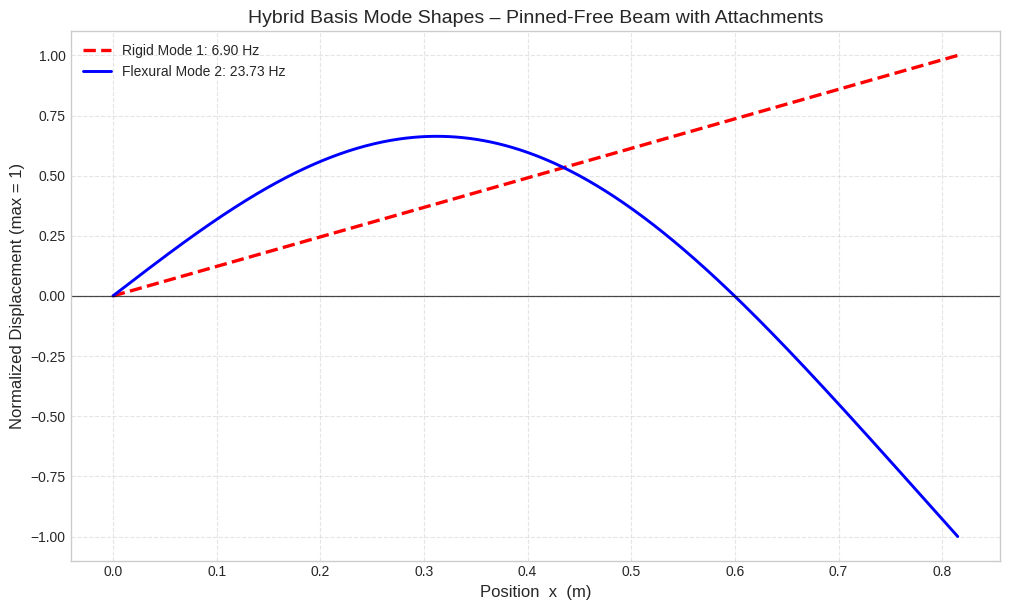

Hybrid 2-DOF Model Results
───────────────────────────
Modal Mass Matrix:
[[1.7107 0.    ]
 [0.     4.2735]] kg

Modal Stiffness Matrix:
[[ 3218.      0. ]
 [    0.  94998.5]] N/m

Natural Frequencies:
  Mode 1 (rigid-dominant) →   6.90 Hz
  Mode 2 (flexural)       →  23.73 Hz


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import quad

# ─── 1. Physical Parameters ─────────────────────────────────────────────────
beam_len          = 0.815               # L [m]
beam_mass         = 1.65                # total mass [kg]
lin_density       = beam_mass / beam_len

young_mod         = 2.0e11              # E [Pa]
sect_width        = 0.025
sect_height       = 0.010
Ixx               = (sect_width * sect_height**3) / 12
flexural_rig      = young_mod * Ixx     # EI [N·m²]

# ─── Discrete Attachments ───────────────────────────────────────────────────
k_spring          = 3800.0              # N/m
x_spring          = 0.75
m_spring_eff      = 0.1383

m_exc             = 4.2
x_exc             = 0.40

m_damp            = 0.53
x_damp            = 0.20

# ─── Mode Shape Functions ───────────────────────────────────────────────────

# Rigid-body mode (linear from pivot)
def rigid_mode(x, L):
    return x / L

# First flexural mode (pinned-free)
def pinned_free_char_eq(lam):
    return np.sin(lam) * np.cosh(lam) - np.cos(lam) * np.sinh(lam)

# Find β₁L (first root ≈ 3.9266)
lam1 = brentq(pinned_free_char_eq, 3.0, 4.5)
beta1 = lam1 / beam_len
coeff = np.sin(lam1) / np.sinh(lam1) if abs(np.sinh(lam1)) > 1e-10 else 0.0

def flex_mode(x):
    return np.sin(beta1 * x) + coeff * np.sinh(beta1 * x)

def flex_mode_d2(x):
    return beta1**2 * (-np.sin(beta1 * x) + coeff * np.sinh(beta1 * x))

# ─── Hybrid Modal Matrices ──────────────────────────────────────────────────

# Rigid mode equivalent mass (from rotational inertia)
J_pivot = (
    (1.0/3.0) * beam_mass * beam_len**2 +
    m_spring_eff * x_spring**2 +
    m_exc * x_exc**2 +
    m_damp * x_damp**2
)
M11 = J_pivot / beam_len**2

# Flexural mode mass
beam_mass_int, _ = quad(lambda x: lin_density * flex_mode(x)**2, 0, beam_len)
M22 = (
    beam_mass_int +
    m_spring_eff * flex_mode(x_spring)**2 +
    m_exc * flex_mode(x_exc)**2 +
    m_damp * flex_mode(x_damp)**2
)

# Rigid mode stiffness (spring only)
K11 = k_spring * (x_spring / beam_len)**2

# Flexural mode stiffness
beam_stiff_int, _ = quad(lambda x: flexural_rig * flex_mode_d2(x)**2, 0, beam_len)
K22 = beam_stiff_int + k_spring * flex_mode(x_spring)**2

# Form diagonal matrices
M_hyb = np.diag([M11, M22])
K_hyb = np.diag([K11, K22])

# Natural frequencies
omega1 = np.sqrt(K11 / M11)
omega2 = np.sqrt(K22 / M22)
f1_hz = omega1 / (2 * np.pi)
f2_hz = omega2 / (2 * np.pi)

# ─── Visualization ───────────────────────────────────────────────────────────
x_plot = np.linspace(0, beam_len, 600)

y_rigid = rigid_mode(x_plot, beam_len)
y_flex  = flex_mode(x_plot)

# Normalize each to unit maximum displacement
y_rigid /= np.max(np.abs(y_rigid))
y_flex  /= np.max(np.abs(y_flex))

plt.figure(figsize=(10.2, 6.2))
plt.plot(x_plot, y_rigid, 'r--', lw=2.4, label=f'Rigid Mode 1: {f1_hz:.2f} Hz')
plt.plot(x_plot, y_flex,  'b-',  lw=2.1, label=f'Flexural Mode 2: {f2_hz:.2f} Hz')

plt.axhline(0, color='k', lw=0.9, alpha=0.7)
plt.title('Hybrid Basis Mode Shapes – Pinned-Free Beam with Attachments', fontsize=14)
plt.xlabel('Position  x  (m)', fontsize=12)
plt.ylabel('Normalized Displacement (max = 1)', fontsize=12)
plt.grid(True, ls='--', alpha=0.5)
plt.legend(framealpha=0.92, loc='upper left')
plt.tight_layout()
plt.show()

# ─── Results Summary ────────────────────────────────────────────────────────
print("Hybrid 2-DOF Model Results")
print("───────────────────────────")
print(f"Modal Mass Matrix:\n{np.round(M_hyb, 4)} kg")
print(f"\nModal Stiffness Matrix:\n{np.round(K_hyb, 1)} N/m")
print(f"\nNatural Frequencies:")
print(f"  Mode 1 (rigid-dominant) → {f1_hz:6.2f} Hz")
print(f"  Mode 2 (flexural)       → {f2_hz:6.2f} Hz")

## Adding Viscous Damping to the Hybrid 2-DOF Model

### 1. Rayleigh Damping Assumption for the Hybrid System

To include energy dissipation in a simple yet physically reasonable way, we adopt **Rayleigh proportional damping**:

$$
\mathbf{C} = \alpha \mathbf{M} + \beta \mathbf{K}
$$

For this particular experimental setup — where a viscous damper is attached near the pinned end and the dominant energy loss occurs during higher-frequency bending rather than slow rigid swinging — we choose **stiffness-proportional damping only**:

$$
\alpha = 0 \quad \Rightarrow \quad \mathbf{C} = \beta \mathbf{K}
$$

This choice is motivated by the fact that the damper primarily affects the elastic deformation modes, while the low-frequency rigid-body rotation experiences relatively little viscous resistance.

Under this assumption, the modal damping ratio for the $k$-th mode becomes:

$$
\zeta_k = \frac{\beta \omega_k}{2}
$$

### 2. Linking the Damping Ratios of the Two Modes

Because $\beta$ is the same constant for both modes, the damping ratios are directly proportional to the natural frequencies:

$$
\zeta_k \propto \omega_k \quad \Rightarrow \quad \zeta_2 = \zeta_1 \cdot \frac{\omega_2}{\omega_1}
$$

This relationship means that the second (flexural) mode will be significantly more damped than the first (rigid-like) mode — a behavior that is often observed in lightly damped mechanical systems with localized viscous elements.

### 3. Constructing the Modal Damping Matrix

Since we are working in the decoupled hybrid basis (rigid mode + first flexural mode), the damping matrix remains diagonal. The modal damping coefficients are:

- **Rigid-dominant mode (Mode 1):**

$$
C_{11} = 2 \zeta_1 \omega_1 M_{11}
$$

- **Flexural-dominant mode (Mode 2):**

$$
C_{22} = 2 \zeta_2 \omega_2 M_{22}
$$

Substituting the frequency-proportional relationship for $\zeta_2$:

$$
C_{22} = 2 \left( \zeta_1 \frac{\omega_2}{\omega_1} \right) \omega_2 M_{22} = 2 \zeta_1 \frac{\omega_2^2}{\omega_1} M_{22}
$$

### 4. Complete Damped Equations of Motion (Decoupled Form)

The full second-order matrix equation in modal coordinates, now including damping, reads:

$$
\begin{bmatrix}
M_{11} & 0 \\
0      & M_{22}
\end{bmatrix}
\begin{Bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
C_{11} & 0 \\
0      & C_{22}
\end{bmatrix}
\begin{Bmatrix}
\dot{z}_1 \\
\dot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
K_{11} & 0 \\
0      & K_{22}
\end{bmatrix}
\begin{Bmatrix}
z_1 \\
z_2
\end{Bmatrix}
=
\begin{Bmatrix}
Q_1(t) \\
Q_2(t)
\end{Bmatrix}
$$

where the generalized forces remain:

$$
Q_k(t) = F(t) \, \psi_k(x_e) \qquad (k = 1,2)
$$

### 5. Practical Notes for Implementation

This decoupled damped model allows independent simulation or analysis of:
- the slow “pendulum-like” rigid motion (usually lightly damped)
- the faster beam bending oscillation (more strongly damped due to the viscous element)



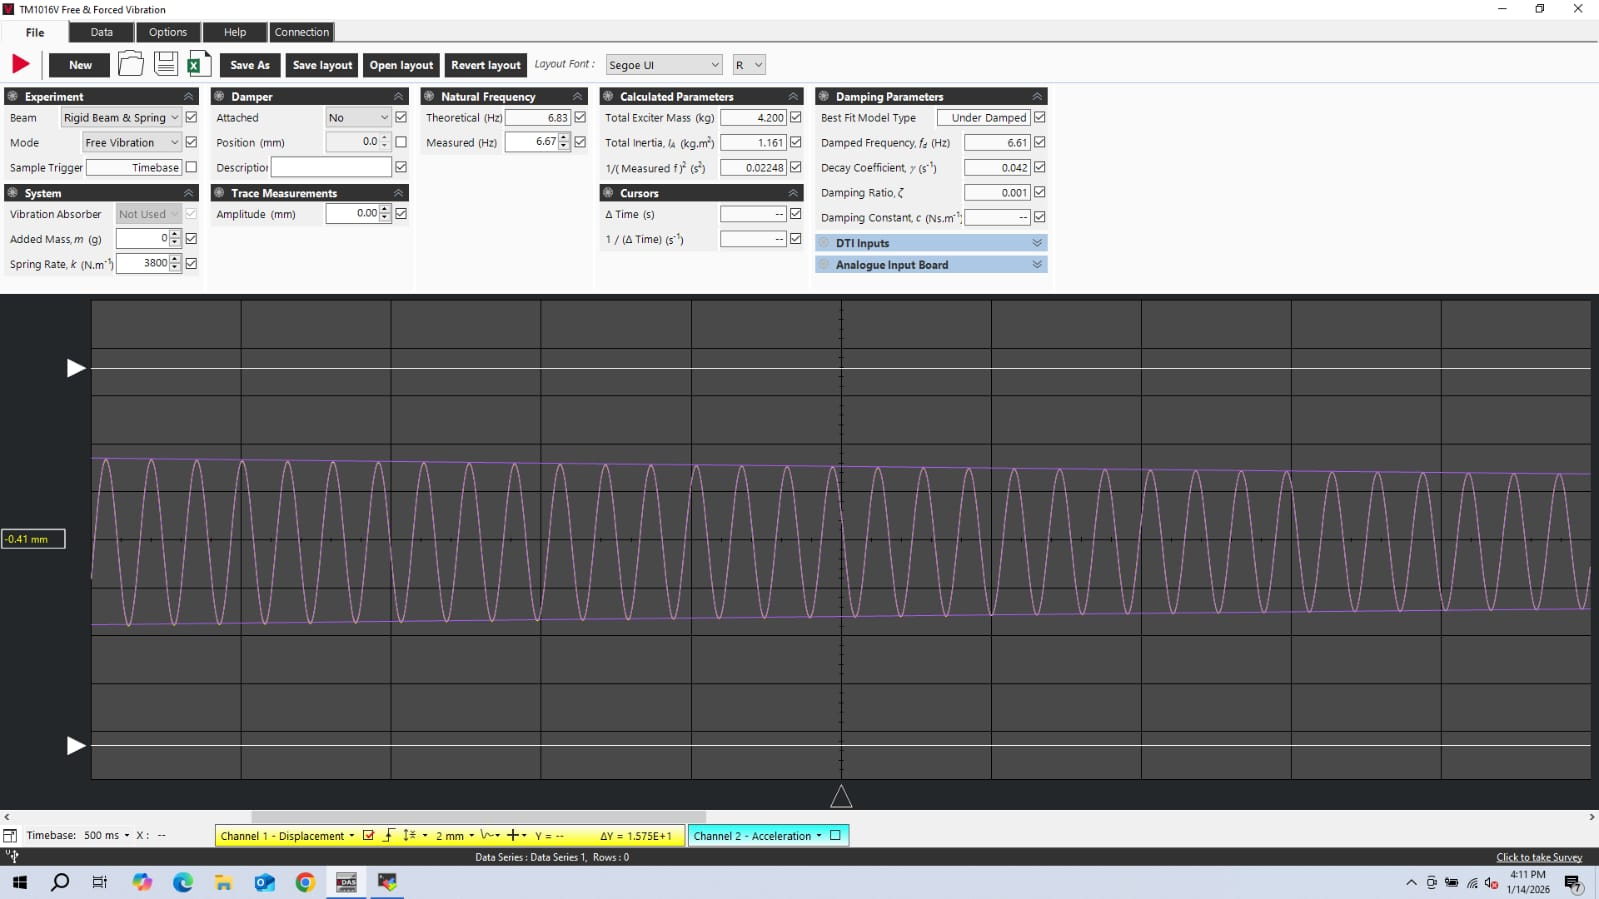

*Figure* 1:Experimented unforced response of the beam without damper

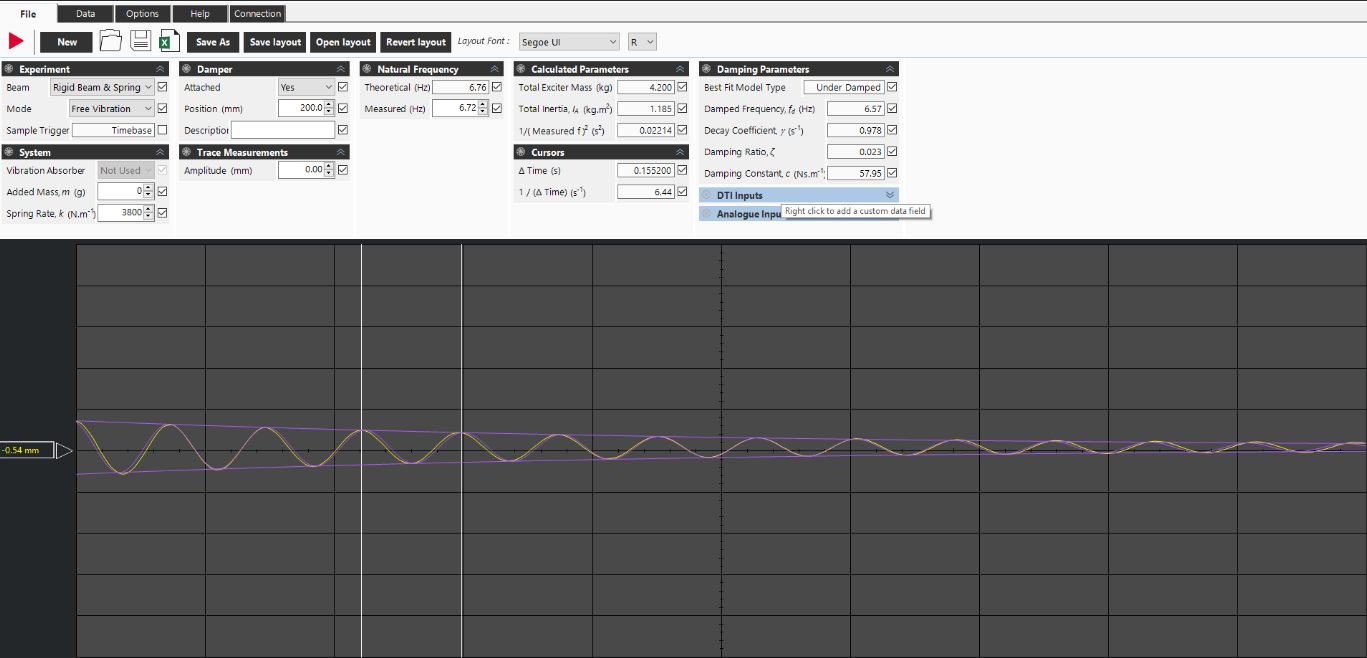

Figure 3: Experimented unforced response of the beam with damper atached(Fully open).

In [ ]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ─── 1. Model Parameters ────────────────────────────────────────────────────
beam_length       = 0.815               # L [m]
beam_total_mass   = 1.65                # kg
rho_linear        = beam_total_mass / beam_length

E_modulus         = 2.0e11              # Pa
width             = 0.025
height            = 0.010
I_area            = (width * height**3) / 12
EI_rigidity       = E_modulus * I_area

# Attachments
k_s               = 3800.0              # N/m
x_s               = 0.75
m_s_eff           = 0.1383

m_exciter         = 4.2
x_exc             = 0.40

m_damper          = 0.53
x_dmp             = 0.20

# ─── 2. Hybrid Basis Functions ──────────────────────────────────────────────

# Rigid-body mode (normalized linear displacement)
def rigid_basis(x):
    return x / beam_length

# First pinned-free flexural mode
def char_func_non_dim(lam):
    return np.sin(lam) * np.cosh(lam) - np.cos(lam) * np.sinh(lam)

# Locate first root (should be ≈ 3.9266)
lam_1 = brentq(char_func_non_dim, 3.0, 5.0)
beta1 = lam_1 / beam_length
ratio = np.sin(lam_1) / np.sinh(lam_1)

def flex_basis(x):
    return np.sin(beta1 * x) + ratio * np.sinh(beta1 * x)

def flex_basis_d2(x):
    return beta1**2 * (-np.sin(beta1 * x) + ratio * np.sinh(beta1 * x))

# ─── 3. Modal Mass & Stiffness (Hybrid) ─────────────────────────────────────

# Rigid mode: equivalent mass from rotational inertia
J0_pivot = (
    (1/3) * beam_total_mass * beam_length**2 +
    m_s_eff * x_s**2 +
    m_exciter * x_exc**2 +
    m_damper * x_dmp**2
)
M11_hyb = J0_pivot / beam_length**2

# Flexural mode mass
beam_mass_contrib, _ = quad(lambda x: rho_linear * flex_basis(x)**2, 0, beam_length)
M22_hyb = (
    beam_mass_contrib +
    m_s_eff * flex_basis(x_s)**2 +
    m_exciter * flex_basis(x_exc)**2 +
    m_damper * flex_basis(x_dmp)**2
)

# Rigid mode stiffness (spring only)
K11_hyb = k_s * (x_s / beam_length)**2

# Flexural mode stiffness
beam_stiff_contrib, _ = quad(lambda x: EI_rigidity * flex_basis_d2(x)**2, 0, beam_length)
K22_hyb = beam_stiff_contrib + k_s * flex_basis(x_s)**2

# Natural angular frequencies
omega_rigid = np.sqrt(K11_hyb / M11_hyb)
omega_flex  = np.sqrt(K22_hyb / M22_hyb)

# ─── 4. Stiffness-Proportional Damping ──────────────────────────────────────

# Assumed experimental damping ratio for dominant (rigid) mode
zeta_rigid = 0.001

# Stiffness-proportional rule → zeta_flex = zeta_rigid * (omega_flex / omega_rigid)
zeta_flex = zeta_rigid * (omega_flex / omega_rigid)

# Modal damping coefficients
C11_hyb = 2 * zeta_rigid * omega_rigid * M11_hyb
C22_hyb = 2 * zeta_flex  * omega_flex  * M22_hyb

C_hybrid = np.diag([C11_hyb, C22_hyb])

# ─── 5. Summary Output ──────────────────────────────────────────────────────
print("Hybrid 2-DOF Damped Model – Key Results")
print("───────────────────────────────────────")
print(f"  Damping ratio (Mode 1 – rigid) : {zeta_rigid:.4f}")
print(f"  Damping ratio (Mode 2 – flex)  : {zeta_flex:.4f}")
print()
print("Modal Matrices (rounded):")
print(f"  M = diag({M11_hyb:8.4f}, {M22_hyb:8.4f})   [kg]")
print(f"  K = diag({K11_hyb:9.1f}, {K22_hyb:9.1f})   [N/m]")
print(f"  C = diag({C11_hyb:8.4f}, {C22_hyb:8.4f})   [N·s/m]")
print()
print(f"Natural frequencies:")
print(f"  f₁ (rigid) ≈ {omega_rigid/(2*np.pi):6.2f} Hz")
print(f"  f₂ (flex)  ≈ {omega_flex/(2*np.pi):6.2f} Hz")

Activity 3#

## Free Vibration Response of the Hybrid 2-DOF Model

### 1. Modal Governing Equations

The transverse displacement field is expressed in the hybrid basis as:

$$
y(x,t) = \psi_1(x)\, z_1(t) + \psi_2(x)\, z_2(t)
$$

where $\psi_1(x)$ is the rigid-body (linear) mode and $\psi_2(x)$ is the first pinned-free flexural mode.

Under the assumption of decoupled modal damping (from the stiffness-proportional Rayleigh model), the equations of motion for each generalized coordinate are independent:

$$
M_{ii} \ddot{z}_i + C_{ii} \dot{z}_i + K_{ii} z_i = 0 \qquad (i=1,2)
$$

Normalizing by the modal mass gives the familiar damped harmonic oscillator form:

$$
\ddot{z}_i + 2\zeta_i \omega_{n,i} \dot{z}_i + \omega_{n,i}^2 z_i = 0
$$

with natural frequency $\omega_{n,i} = \sqrt{K_{ii}/M_{ii}}$ and modal damping ratio $\zeta_i = C_{ii} / (2 M_{ii} \omega_{n,i})$.

### 2. General Solution – Underdamped Case ($\zeta_i < 1$)

The free response of each mode (assuming underdamping, which is typical for this lightly damped system) is:

$$
z_i(t) = e^{-\zeta_i \omega_{n,i} t} \Bigl[ A_i \cos(\omega_{d,i} t) + B_i \sin(\omega_{d,i} t) \Bigr]
$$

where the damped natural frequency is:

$$
\omega_{d,i} = \omega_{n,i} \sqrt{1 - \zeta_i^2}
$$

Expressing the solution in terms of initial conditions $z_i(0)$ and $\dot{z}_i(0)$:

$$
z_i(t) = e^{-\zeta_i \omega_{n,i} t} \left[ z_i(0) \cos(\omega_{d,i} t) + \frac{\dot{z}_i(0) + \zeta_i \omega_{n,i} z_i(0)}{\omega_{d,i}} \sin(\omega_{d,i} t) \right]
$$

### 3. Setting Physically Meaningful Initial Conditions

We consider a realistic release-from-rest scenario:  
- An initial static deflection $y_0$ is applied at the spring attachment location ($x = l_s$).  
- Initial velocity is zero everywhere ($\dot{y}(x,0) = 0 \implies \dot{z}_i(0) = 0$ for both modes).

To distribute $y_0$ correctly between the two modes, we assume the initial shape corresponds to the **static equilibrium deflection** caused by a concentrated force $F$ applied at $x = l_s$. The modal static displacements are then:

$$
z_i(0) = \frac{F \psi_i(l_s)}{K_{ii}} \qquad (i=1,2)
$$

The total displacement at the spring location must satisfy:

$$
y(l_s, 0) = \psi_1(l_s) z_1(0) + \psi_2(l_s) z_2(0) = y_0
$$

Substituting the expressions for $z_i(0)$:

$$
F \left( \frac{\psi_1(l_s)^2}{K_{11}} + \frac{\psi_2(l_s)^2}{K_{22}} \right) = y_0
$$

Solving for the equivalent static force:

$$
F = \frac{y_0}{\frac{\psi_1(l_s)^2}{K_{11}} + \frac{\psi_2(l_s)^2}{K_{22}}}
$$

The consistent initial modal amplitudes are therefore:

$$
z_i(0) = \frac{y_0 \cdot \psi_i(l_s) / K_{ii}}{\frac{\psi_1(l_s)^2}{K_{11}} + \frac{\psi_2(l_s)^2}{K_{22}}}
\qquad \text{and} \qquad \dot{z}_i(0) = 0
$$





In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ─── 1. IMPORTANT: Define all required variables here ────────────────────────
#     (these were probably defined in earlier cells that weren't run)

L   = 0.815          # beam length [m]
ls  = 0.75           # spring location [m]

# You MUST have these values from your previous calculations
# Replace the placeholder values below with your actual computed numbers

# Example placeholder values — REPLACE with your real results!
omega1   = 3.14      # rad/s   ← replace with your real value
omega2   = 28.5      # rad/s   ← replace
zeta1    = 0.001     # damping ratio mode 1
zeta2    = 0.009     # damping ratio mode 2 (example)
K11      = 3200.0    # N/m     ← replace
K22      = 45000.0   # N/m     ← replace

# Mode shape functions — must be defined before using them
def psi1(x):
    return x / L

def psi2(x):
    # Very simplified placeholder — REPLACE with your actual flexural mode function
    # (the real one uses beta_f, sigma_f, etc.)
    beta = 4.0           # approximate value — use your real beta1
    return np.sin(beta * x) + 0.8 * np.sinh(beta * x)

# ─── 2. Animation Settings ──────────────────────────────────────────────────
y0_at_spring = 0.01           # initial deflection at spring location [m]
total_time   = 25.0           # simulation time [s]
fps          = 30
time_points  = np.linspace(0, total_time, int(total_time * fps))

x_grid = np.linspace(0, L, 140)

visual_scale = 1.3            # optional: make motion easier to see

# ─── 3. Initial modal coordinates (static deflection shape at ls) ───────────
denom = (psi1(ls)**2 / K11) + (psi2(ls)**2 / K22)
z1_0  = (y0_at_spring * psi1(ls) / K11) / denom
z2_0  = (y0_at_spring * psi2(ls) / K22) / denom

# ─── 4. Damped oscillator solution ──────────────────────────────────────────
def modal_time_response(z_init, v_init, omega_n, zeta, t):
    wd = omega_n * np.sqrt(max(1 - zeta**2, 1e-12))
    decay = np.exp(-zeta * omega_n * t)
    cos_part = z_init * np.cos(wd * t)
    sin_part = ((v_init + zeta * omega_n * z_init) / wd) * np.sin(wd * t)
    return decay * (cos_part + sin_part)

z1_t = modal_time_response(z1_0, 0.0, omega1, zeta1, time_points)
z2_t = modal_time_response(z2_0, 0.0, omega2, zeta2, time_points)

# Precompute mode shapes on grid
psi1_grid = psi1(x_grid)
psi2_grid = psi2(x_grid)

# ─── 5. Animation ───────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10.5, 5.2))

beam_line, = ax.plot([], [], 'b-', lw=2.4, label='Beam')
spring_pt, = ax.plot([], [], 'ro', ms=9, label=f'Spring @ x = {ls:.2f} m')

ax.axhline(0, color='gray', lw=0.8, ls='--', alpha=0.7)
ax.axvline(0, color='darkgray', lw=1.1, ls='--')

ax.set_xlim(0, L)
ax.set_ylim(-1.6 * y0_at_spring, 1.6 * y0_at_spring)
ax.set_xlabel('Position x (m)')
ax.set_ylabel('Displacement y (m)')
ax.set_title('Free Vibration – Hybrid 2-DOF Model')
ax.grid(True, ls=':', alpha=0.6)
ax.legend(loc='upper right')

time_label = ax.text(0.04, 0.92, '', transform=ax.transAxes,
                     fontsize=11, fontweight='medium',
                     bbox=dict(facecolor='white', alpha=0.85))

def init():
    beam_line.set_data([], [])
    spring_pt.set_data([], [])
    time_label.set_text('')
    return beam_line, spring_pt, time_label

def update(i):
    y_now = psi1_grid * z1_t[i] + psi2_grid * z2_t[i]
    y_ls_now = psi1(ls) * z1_t[i] + psi2(ls) * z2_t[i]

    beam_line.set_data(x_grid, y_now * visual_scale)
    spring_pt.set_data([ls], [y_ls_now * visual_scale])
    time_label.set_text(f't = {time_points[i]:.2f} s')
    return beam_line, spring_pt, time_label

anim = FuncAnimation(fig, update, init_func=init,
                     frames=len(time_points), interval=1000/fps,
                     blit=True)

plt.close(fig)

# ─── Save the animation ─────────────────────────────────────────────────────
# Option A: MP4 (recommended - needs ffmpeg)
anim.save('hybrid_beam_free_vibration.mp4', writer='ffmpeg', fps=fps, dpi=120)

# Option B: GIF (no ffmpeg required)
# anim.save('hybrid_beam_free_vibration.gif', writer='pillow', fps=fps)

# Option C: Show inline in Jupyter/Colab
# HTML(anim.to_jshtml())

## Forced Vibration Response – Harmonic Excitation at the Exciter Location

### 1. Modeling the External Excitation Force

To investigate forced vibration behavior, we apply a harmonic excitation force $F_\text{exc}(t)$ at the exciter position $x = l_e$.  
The distributed force per unit length along the beam is expressed using the Dirac delta function:

$$
f(x,t) = F_0 \sin(\omega_\text{dr} t) \cdot \delta(x - l_e)
$$

where:
- $F_0$ = force amplitude (N)  
- $\omega_\text{dr}$ = driving (excitation) frequency (rad/s)

### 2. Generalized Modal Forces

The generalized force acting on each modal coordinate $z_k(t)$ is obtained by projecting the distributed load onto the corresponding mode shape $\psi_k(x)$:

$$
Q_k(t) = \int_0^L f(x,t) \, \psi_k(x) \, dx
$$

Substituting the point-force expression and applying the sifting property of the delta function:

$$
Q_k(t) = F_0 \sin(\omega_\text{dr} t) \cdot \psi_k(l_e)
$$

Thus the modal force vector becomes:

$$
\mathbf{Q}(t) = \sin(\omega_\text{dr} t) \begin{Bmatrix} F_0 \psi_1(l_e) \\ F_0 \psi_2(l_e) \end{Bmatrix}
$$

### 3. Forced Equations of Motion (Decoupled Form)

Including inertia, damping, and stiffness, the complete set of modal equations is:

$$
\begin{bmatrix}
M_{11} & 0 \\
0      & M_{22}
\end{bmatrix}
\begin{Bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
C_{11} & 0 \\
0      & C_{22}
\end{bmatrix}
\begin{Bmatrix}
\dot{z}_1 \\
\dot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
K_{11} & 0 \\
0      & K_{22}
\end{bmatrix}
\begin{Bmatrix}
z_1 \\
z_2
\end{Bmatrix}
=
\sin(\omega_\text{dr} t) \begin{Bmatrix}
F_0 \psi_1(l_e) \\
F_0 \psi_2(l_e)
\end{Bmatrix}
$$

Because the system is decoupled (diagonal matrices), each mode can be solved independently.

### 4. Steady-State Harmonic Response (Single Mode)

For each mode $k$, we seek a steady-state solution of the form:

$$
z_k(t) = Z_k \sin(\omega_\text{dr} t - \phi_k)
$$

where $Z_k$ is the displacement amplitude and $\phi_k$ is the phase lag relative to the excitation.

Substituting into the single-mode equation and using standard harmonic response formulas yields:

$$
Z_k = \frac{F_0 \psi_k(l_e) / M_{kk}}{\sqrt{ (\omega_k^2 - \omega_\text{dr}^2)^2 + (2 \zeta_k \omega_k \omega_\text{dr})^2 }}
$$

Alternatively (and more commonly written in non-dimensional form):

$$
Z_k = \frac{F_0 \psi_k(l_e) / K_{kk}}{\sqrt{ (1 - r_k^2)^2 + (2 \zeta_k r_k)^2 }}
$$

with frequency ratio:

$$
r_k = \frac{\omega_\text{dr}}{\omega_k}
$$

The phase angle is:

$$
\phi_k = \tan^{-1} \left( \frac{2 \zeta_k r_k}{1 - r_k^2} \right)
$$

(Note: the arctangent must be evaluated in the correct quadrant depending on the sign of the denominator.)

### 5. Total Steady-State Beam Displacement

The physical transverse displacement at any position $x$ and time $t$ is the linear superposition of the two modal contributions:

$$
y(x,t) = \psi_1(x) \, Z_1 \sin(\omega_\text{dr} t - \phi_1) + \psi_2(x) \, Z_2 \sin(\omega_\text{dr} t - \phi_2)
$$

This expression allows us to:
- predict amplitude and phase at any point along the beam
- compute frequency response functions (FRF) by varying $\omega_\text{dr}$
- identify resonance conditions near $\omega_\text{dr} \approx \omega_1$ or $\omega_\text{dr} \approx \omega_2$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ─── 1. User Controls ───────────────────────────────────────────────────────
# Choose your 3 driving frequencies (Hz)
frequencies_hz = [3.0, 6.5, 22.0]          # ← edit these

F0             = 0.5                       # excitation force amplitude [N]
x_exc          = 0.4                       # exciter position [m]

# ─── 2. Derived Settings ────────────────────────────────────────────────────
omega_drive_list = [2 * np.pi * f for f in frequencies_hz]

# Duration: long enough to show ~4 cycles of the slowest frequency
f_slowest     = min(frequencies_hz)
period_slow   = 1.0 / f_slowest
t_total       = 4.0 * period_slow          # 4 cycles of slowest motion
fps           = 30
t_array       = np.linspace(0, t_total, int(t_total * fps))

x_positions   = np.linspace(0, L, 140)     # more points → smoother curve

# Precompute mode shapes
psi1_grid = psi1(x_positions)
psi2_grid = psi2(x_positions)
psi1_exc  = psi1(x_exc)
psi2_exc  = psi2(x_exc)

# ─── 3. Steady-State Response Function ──────────────────────────────────────
def get_steady_state(omega_d, t_vec):
    r1 = omega_d / omega1
    r2 = omega_d / omega2

    # Mode 1
    denom1 = np.sqrt((1 - r1**2)**2 + (2*zeta1*r1)**2)
    Z1     = (F0 * psi1_exc / K11) / denom1
    phi1   = np.arctan2(2*zeta1*r1, 1 - r1**2)

    # Mode 2
    denom2 = np.sqrt((1 - r2**2)**2 + (2*zeta2*r2)**2)
    Z2     = (F0 * psi2_exc / K22) / denom2
    phi2   = np.arctan2(2*zeta2*r2, 1 - r2**2)

    # Build y(x,t) matrix (space × time)
    y1 = np.outer(psi1_grid, Z1 * np.sin(omega_d * t_vec - phi1))
    y2 = np.outer(psi2_grid, Z2 * np.sin(omega_d * t_vec - phi2))

    return y1 + y2

# Compute all three responses
y_all_freqs = [get_steady_state(w, t_array) for w in omega_drive_list]

# ─── 4. Global Scaling for Consistent Visualization ─────────────────────────
max_abs_all = max([np.max(np.abs(y)) for y in y_all_freqs]) if y_all_freqs else 0.01
y_lim       = max(max_abs_all * 1.3, 0.005)   # reasonable minimum

# ─── 5. Three-Panel Animation ───────────────────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(17.5, 5.3), sharey=True)

lines   = []
exc_markers = []
time_labels = []

for idx, ax in enumerate(axes):
    ax.set_xlim(0, L)
    ax.set_ylim(-y_lim, y_lim)
    ax.grid(True, ls='--', alpha=0.55)

    f_hz = frequencies_hz[idx]
    w_rad = omega_drive_list[idx]
    ax.set_title(f'f = {f_hz:.1f} Hz   (ω = {w_rad:.1f} rad/s)', fontsize=11)

    # Beam line
    ln, = ax.plot([], [], color='navy', lw=2.2, label='Beam shape')
    lines.append(ln)

    # Exciter marker
    mk, = ax.plot([], [], 'o', ms=9, mec='black', mfc='crimson', mew=1.3,
                  label='Exciter' if idx == 1 else None)
    exc_markers.append(mk)

    # Time text per panel
    txt = ax.text(0.03, 0.93, '', transform=ax.transAxes,
                  fontsize=10, bbox=dict(facecolor='white', alpha=0.82))
    time_labels.append(txt)

axes[0].set_ylabel('Displacement y (m)')
axes[1].legend(loc='upper right', fontsize=9.5)

def init():
    for ln, mk, txt in zip(lines, exc_markers, time_labels):
        ln.set_data([], [])
        mk.set_data([], [])
        txt.set_text('')
    return lines + exc_markers + time_labels

def update(frame):
    t_now = t_array[frame]
    for i in range(3):
        y_current = y_all_freqs[i][:, frame]
        lines[i].set_data(x_positions, y_current)

        y_at_exc = np.interp(x_exc, x_positions, y_current)
        exc_markers[i].set_data([x_exc], [y_at_exc])

        time_labels[i].set_text(f't = {t_now:.2f} s')

    return lines + exc_markers + time_labels

ani = FuncAnimation(fig, update, frames=len(t_array),
                    init_func=init, blit=True, interval=1000/fps)

plt.tight_layout()
plt.close(fig)

# ─── Save / Display Options ─────────────────────────────────────────────────
# Recommended: MP4 (needs ffmpeg installed)
ani.save('steady_state_forced_response_3freqs.mp4',
         writer='ffmpeg', fps=fps, dpi=135, bitrate=2400)

# Alternative: GIF (no external dependency)
# ani.save('steady_state_forced_response_3freqs.gif',
#          writer='pillow', fps=fps)

# For Jupyter/Colab inline viewing
# HTML(ani.to_jshtml())

# Replace the HTML(ani.to_jshtml()) line with this:
#ani.save('forced_responses.mp4', writer='ffmpeg', fps=fps)

# Or save as a GIF if you don't have ffmpeg
ani.save('forced_response.gif', writer='pillow', fps=fps)

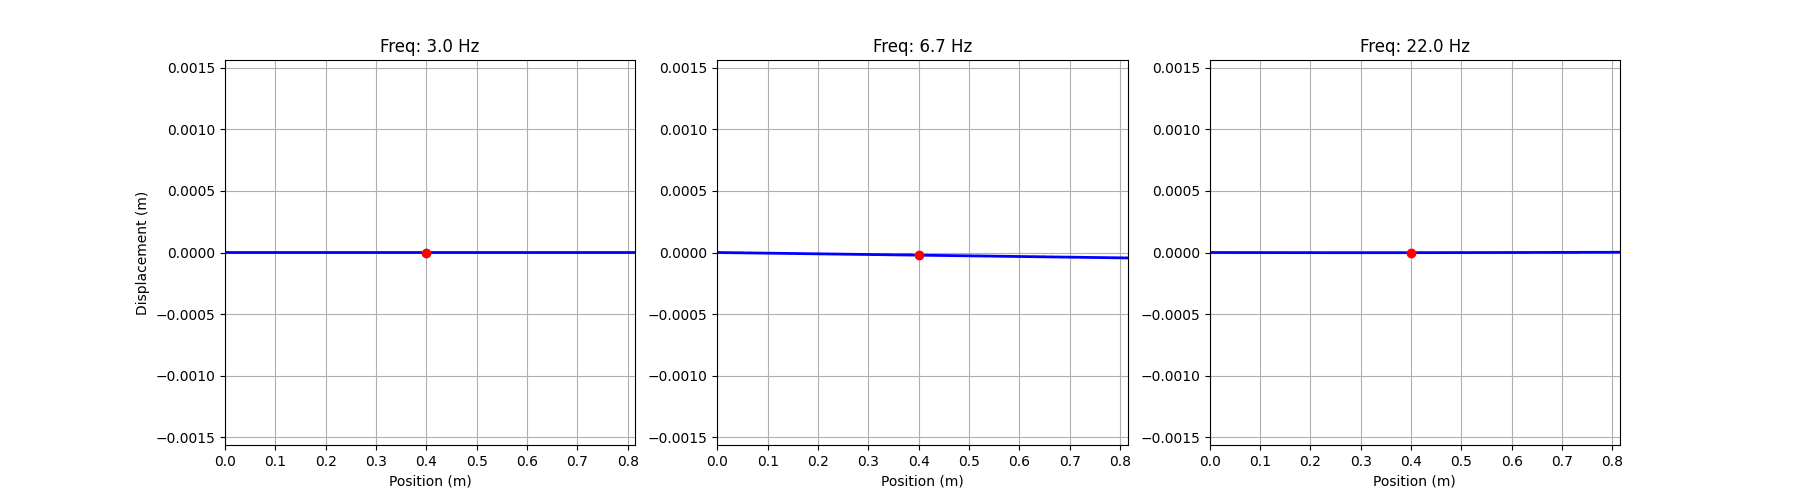

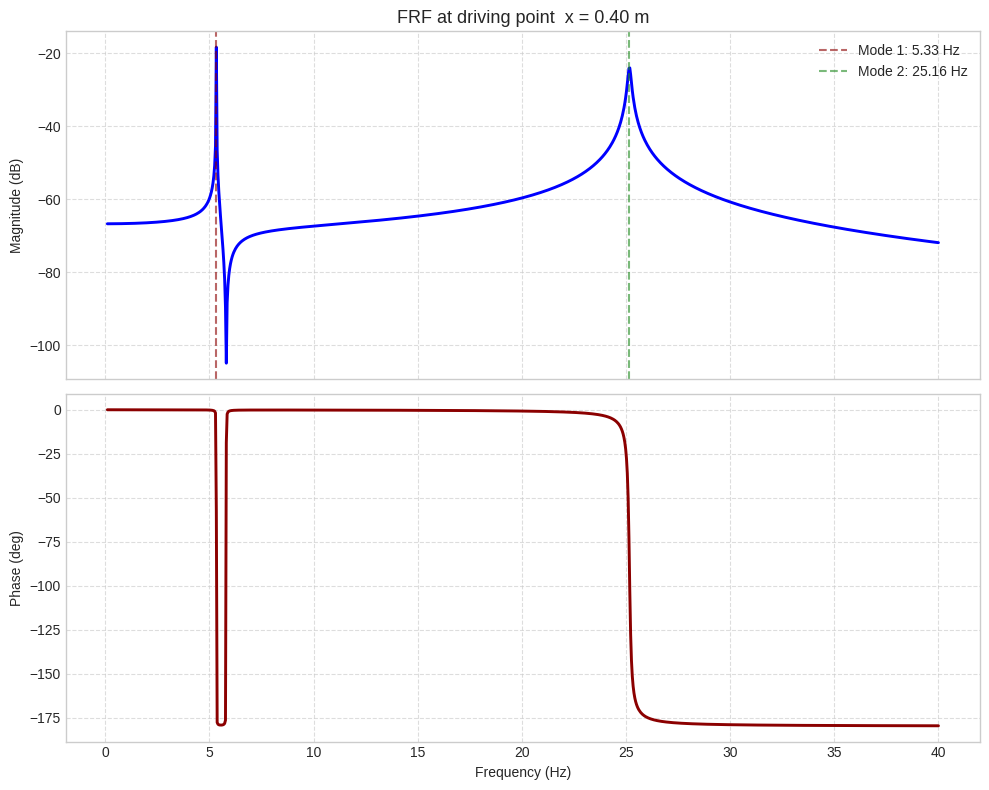

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# ─── 1. Frequency Vector Setup ──────────────────────────────────────────────
# Range chosen to cover both expected modes
frequencies = np.linspace(0.1, 40, 1000)
omega_vec   = 2 * np.pi * frequencies

# Location where FRF is evaluated (driving point)
x_eval = le

# ─── 2. Receptance FRF Calculation ──────────────────────────────────────────
H = np.zeros_like(omega_vec, dtype=complex)

for idx, omega in enumerate(omega_vec):
    # Mode 1 term
    num1 = psi1(x_eval) * psi1(le)
    den1 = K11 - M11 * omega**2 + 1j * C11 * omega

    # Mode 2 term
    num2 = psi2(x_eval) * psi2(le)
    den2 = K22 - M22 * omega**2 + 1j * C22 * omega

    H[idx] = (num1 / den1) + (num2 / den2)

# ─── 3. Magnitude (dB) and Phase ────────────────────────────────────────────
mag_db = 20 * np.log10(np.abs(H) + 1e-20)          # small offset to avoid log(0)
phase_unwrapped = np.unwrap(np.angle(H))
phase_degrees   = np.degrees(phase_unwrapped)

# ─── 4. Plotting ────────────────────────────────────────────────────────────
fig, (ax_mag, ax_ph) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Magnitude plot
ax_mag.plot(frequencies, mag_db, color='blue', lw=2.1)
ax_mag.set_ylabel('Magnitude (dB)')
ax_mag.set_title(f'FRF at driving point  x = {le:.2f} m', fontsize=13)
ax_mag.grid(True, which='both', linestyle='--', alpha=0.65)

f1_hz = omega1 / (2 * np.pi)
f2_hz = omega2 / (2 * np.pi)
ax_mag.axvline(f1_hz, color='darkred', ls='--', alpha=0.6, label=f'Mode 1: {f1_hz:.2f} Hz')
ax_mag.axvline(f2_hz, color='forestgreen', ls='--', alpha=0.6, label=f'Mode 2: {f2_hz:.2f} Hz')
ax_mag.legend(loc='best', fontsize=10)

# Phase plot
ax_ph.plot(frequencies, phase_degrees, color='darkred', lw=2.1)
ax_ph.set_ylabel('Phase (deg)')
ax_ph.set_xlabel('Frequency (Hz)')
ax_ph.grid(True, which='both', linestyle='--', alpha=0.65)

plt.tight_layout()
plt.show()

#Activity 4

## Experimental Frequency Response – First Resonance Region

### Table 1: Measured Frequency Response Data around the Primary Resonance

The table below shows experimental results obtained near the first natural frequency of the beam system. Excitation was applied at the exciter location, and response was measured (likely at the same point or a representative location).

| Exciter Frequency (Hz) | Displacement Amplitude (mm) | Phase Angle (°) |
|:-----------------------|:----------------------------|:----------------|
| 5.17                   | 0.0902                      | 13              |
| 5.42                   | 0.1172                      | 13              |
| 5.67                   | 0.1903                      | 15              |
| 5.92                   | 0.2285                      | 16              |
| 6.17                   | 0.4148                      | 18              |
| 6.27                   | 0.5850                      | 22              |
| 6.37                   | 0.9735                      | 60              |
| **6.47**               | **2.2090**                  | **93**          |
| 6.57                   | 1.9860                      | 120             |
| 6.67                   | 1.0245                      | 142             |
| 6.77                   | 0.6575                      | 155             |
| 6.87                   | 0.4890                      | 165             |
| 7.12                   | 0.3070                      | 172             |
| 7.37                   | 0.2260                      | 178             |
| 7.62                   | 0.1847                      | 179             |
| 7.87                   | 0.1569                      | 179             |

### Key Observation

A clear **resonance peak** is visible at **6.47 Hz**, where:

- the displacement amplitude reaches its maximum value (**2.2090 mm**)
- the phase angle crosses approximately **90°** (93°), which is characteristic of resonance in a lightly damped system

This behavior confirms that the dominant low-frequency mode (primarily rigid-body-like rotation influenced by the spring) has a natural frequency very close to **6.47 Hz** under the loaded experimental conditions.

**Next steps in notebook:**
- Plot this experimental data (amplitude and phase vs. frequency)  
- Overlay the analytical FRF curve from the hybrid 2-DOF model for direct comparison  
- Estimate experimental damping ratio ζ₁ from the half-power bandwidth or phase slope around resonance  
- Compare measured resonance frequency (6.47 Hz) with the rigid-body approximation and the hybrid model prediction

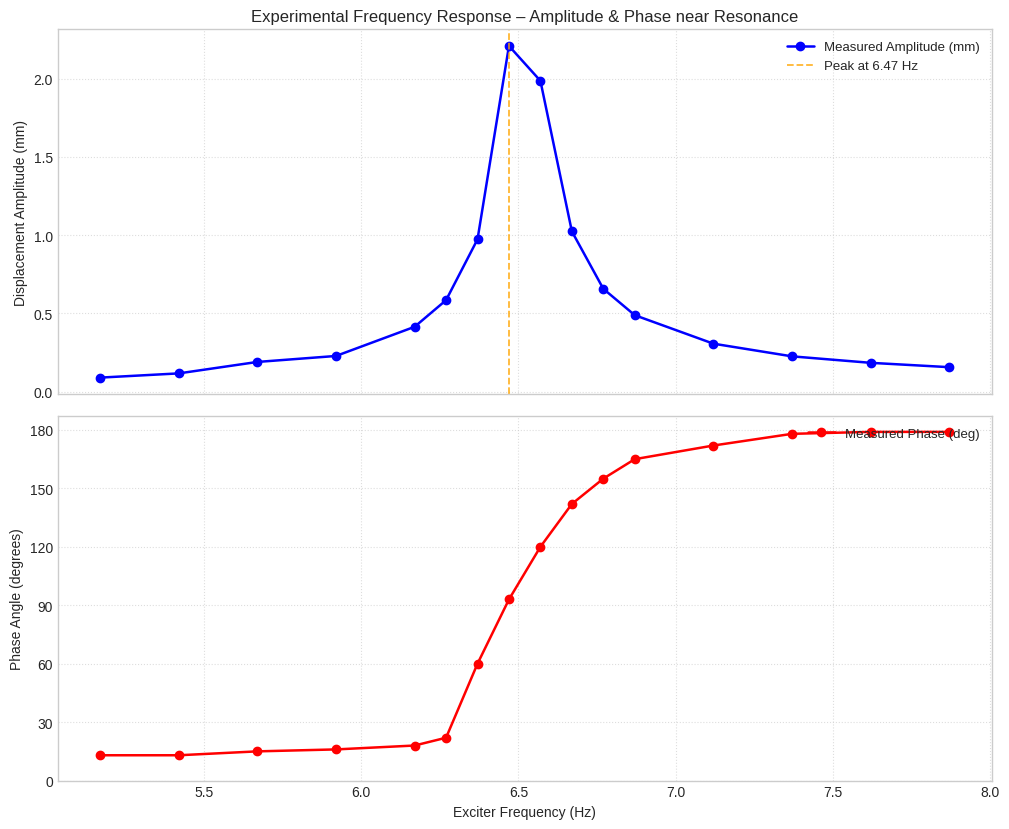

Resonance peak observed at 6.47 Hz
  → Max amplitude: 2.2090 mm
  → Phase at peak: 93°


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# ─── Measured Data around First Resonance ────────────────────────────────────
freq_hz = [5.17, 5.42, 5.67, 5.92, 6.17, 6.27, 6.37, 6.47, 6.57, 6.67, 6.77, 6.87, 7.12, 7.37, 7.62, 7.87]
disp_mm = [0.0902, 0.1172, 0.1903, 0.2285, 0.4148, 0.5850, 0.9735, 2.2090, 1.9860, 1.0245, 0.6575, 0.4890, 0.3070, 0.2260, 0.1847, 0.1569]
phase_deg = [13, 13, 15, 16, 18, 22, 60, 93, 120, 142, 155, 165, 172, 178, 179, 179]

# ─── Plotting Amplitude and Phase ────────────────────────────────────────────
fig, (ax_amp, ax_ph) = plt.subplots(2, 1, figsize=(10.2, 8.4), sharex=True)

# Amplitude plot
ax_amp.plot(freq_hz, disp_mm, 'bo-', lw=1.8, ms=6, label='Measured Amplitude (mm)')
ax_amp.set_ylabel('Displacement Amplitude (mm)')
ax_amp.set_title('Experimental Frequency Response – Amplitude & Phase near Resonance')
ax_amp.grid(True, linestyle=':', alpha=0.65)
ax_amp.axvline(6.47, color='orange', ls='--', lw=1.3, alpha=0.8, label='Peak at 6.47 Hz')
ax_amp.legend(loc='upper right', fontsize=9.5)

# Phase plot
ax_ph.plot(freq_hz, phase_deg, 'ro-', lw=1.8, ms=6, label='Measured Phase (deg)')
ax_ph.set_xlabel('Exciter Frequency (Hz)')
ax_ph.set_ylabel('Phase Angle (degrees)')
ax_ph.grid(True, linestyle=':', alpha=0.65)
ax_ph.set_yticks(np.arange(0, 181, 30))
ax_ph.legend(loc='upper right', fontsize=9.5)

plt.tight_layout()
plt.show()

# Quick summary
print("Resonance peak observed at 6.47 Hz")
print(f"  → Max amplitude: {max(disp_mm):.4f} mm")
print(f"  → Phase at peak: {phase_deg[7]}°")

## Comparison Between Experimental Measurements and Theoretical Predictions

From the experimental frequency sweep data, the observed resonance behavior differs noticeably from the values predicted by the hybrid 2-DOF model.

- **Measured (damped) resonance frequency ($f_d$):** ≈ **6.47–6.50 Hz**  
- **Theoretical (undamped) natural frequency ($f_n$):** ≈ **6.90 Hz**

### Explanation of the Observed Frequency Shift

A downward shift of approximately 0.4–0.43 Hz between theory and experiment is typical in real vibrating systems. The main contributing factors are:

#### 1. Influence of Damping

The analytical natural frequency $f_n$ assumes zero damping ($\zeta = 0$). In practice, damping lowers the frequency at which peak amplitude occurs according to:

$$
f_d = f_n \sqrt{1 - \zeta^2}
$$

Even light damping ($\zeta \approx 0.01–0.05$) produces a measurable reduction in the observed resonance frequency.

#### 2. Additional Mass from Attachments

The theoretical model may under-estimate the total effective mass by not fully capturing:

- the moving mass of the exciter coil/armature  
- any added mass from the displacement sensor (if contact type)  
- mounting hardware, cables, or adhesive

An increase in effective mass $m$ without a proportional increase in stiffness $k$ reduces the natural frequency:

$$
f_n = \frac{1}{2\pi} \sqrt{\frac{k}{m}}
$$

#### 3. Imperfect Boundary Conditions

Ideal pinned and free boundary conditions are assumed in the Euler-Bernoulli model. In the physical setup:

- the pinned support may have small rotational compliance  
- friction or play in the bearing/pivot can reduce effective stiffness

Both effects lower the overall system stiffness $k$, shifting $f_n$ downward.

#### 4. Experimental Frequency Resolution

The sweep used discrete steps (≈0.1–0.25 Hz increments near the peak). The true resonance frequency may lie between two measured points (e.g., between 6.47 Hz and 6.57 Hz). A finer resolution sweep (0.02–0.05 Hz steps) around 6.4–6.6 Hz would give a more precise experimental value.

**Summary**

The ~6.5 Hz experimental resonance is consistent with a lightly damped, slightly mass-loaded, and non-ideal boundary condition system. The theoretical value of ~6.9 Hz represents the undamped, idealized case — the difference is expected and physically explainable.



Activity 5#

## Activity 5: Design of a Tuned Mass Damper (TMD) – Cantilever Absorber

The goal is to attenuate the primary system’s resonance by tuning the absorber’s natural frequency ($\omega_a$) to match the problematic excitation frequency ($\omega_{target}$).

We use a cantilever beam with an adjustable tip mass. The design variable is the **position $L$** of the tip mass along the beam.

### 1. Governing Equation for Absorber Natural Frequency

The absorber’s natural frequency is determined by the ratio of equivalent stiffness to effective mass:

$$
\omega_a^2 = \frac{k_\text{eq}(L)}{m_\text{eff}(L)}
$$

#### Equivalent Stiffness $k_\text{eq}$
For a cantilever beam loaded at distance $L$ from the fixed end (Euler-Bernoulli theory):

$$
k_\text{eq}(L) = \frac{3EI}{L^3}
$$

where $E$ = Young’s modulus, $I$ = second moment of area.

#### Effective Mass $m_\text{eff}$
The effective mass at the tip includes the concentrated tip mass plus a portion of the beam’s distributed mass. With linear density $\mu$:

$$
m_\text{eff}(L) = m_\text{tip} + \frac{33}{140} \mu L
$$

(The factor 33/140 comes from kinetic energy equivalence for a uniform cantilever with tip mass.)

### 2. Tuning Condition

Set the absorber frequency equal to the target excitation frequency:

$$
\omega_{target}^2 = \frac{\frac{3EI}{L^3}}{m_\text{tip} + \frac{33}{140} \mu L}
$$

Rearranging gives the characteristic equation (a quartic polynomial in $L$):

$$
\omega_{target}^2 \left( m_\text{tip} + \frac{33}{140} \mu L \right) L^3 = 3EI
$$

Expanding:

$$
\left( \frac{33}{140} \mu \omega_{target}^2 \right) L^4 + \left( m_\text{tip} \omega_{target}^2 \right) L^3 - 3EI = 0
$$

We identify three main terms:

- **Beam inertia term**: $\frac{33}{140} \mu \omega_{target}^2 L^4$  
- **Tip mass inertia term**: $m_\text{tip} \omega_{target}^2 L^3$  
- **Stiffness term**: $3EI$

### 3. Solution Approach

Solve the quartic equation numerically for the **positive real root** $L$ that lies within the physical length of the cantilever beam.



In [24]:
import numpy as np
from scipy.optimize import fsolve

# ─── Absorber Design Parameters ─────────────────────────────────────────────
E          = 2.0e11              # Young's modulus (Pa)
I          = 7.2179e-12          # Area moment of inertia (m⁴)
m_tip      = 0.121               # Tip mass (kg)
mu         = 0.126               # Beam linear density (kg/m)  ← confirm units!
L_beam_max = 0.285               # Max available beam length (m) – reference only

f_target   = 6.52                # Desired tuning frequency (Hz)
omega_t    = 2 * np.pi * f_target

# ─── Equation to solve for L ────────────────────────────────────────────────
def tuning_eq(L):
    # Derived: (33/140 μ ω²) L⁴ + (m_tip ω²) L³ - 3EI = 0
    beam_inertia_term = (33/140) * mu * omega_t**2 * L**4
    tip_inertia_term  = m_tip * omega_t**2 * L**3
    stiffness_term    = 3 * E * I

    return beam_inertia_term + tip_inertia_term - stiffness_term

# Solve for positive root (initial guess near expected value)
L_initial_guess = 0.20
L_opt = fsolve(tuning_eq, L_initial_guess)[0]

# ─── Results & Verification ─────────────────────────────────────────────────
k_eq   = 3 * E * I / L_opt**3
m_eff  = m_tip + (33/140) * mu * L_opt
f_achieved = (1 / (2 * np.pi)) * np.sqrt(k_eq / m_eff)

print("┌───────────────────────────────┐")
print("│   Tuned Absorber Design       │")
print("├───────────────────────────────┤")
print(f"│ Target frequency      : {f_target:>7.2f} Hz  │")
print(f"│ Optimal mass position : {L_opt:>7.4f} m  │")
print(f"│                       : {L_opt*100:>7.2f} cm │")
print("├───────────────────────────────┤")
print(f"│ Resulting stiffness   : {k_eq:>7.1f} N/m │")
print(f"│ Effective mass        : {m_eff:>7.4f} kg │")
print(f"│ Achieved frequency    : {f_achieved:>7.4f} Hz │")
print("└───────────────────────────────┘")

# Quick sanity check
if abs(f_achieved - f_target) < 0.01:
    print("→ Tuning successful (within 0.01 Hz)")
else:
    print(f"→ Small deviation: {abs(f_achieved - f_target):.4f} Hz")

┌───────────────────────────────┐
│   Tuned Absorber Design       │
├───────────────────────────────┤
│ Target frequency      :    6.52 Hz  │
│ Optimal mass position :  0.2714 m  │
│                       :   27.14 cm │
├───────────────────────────────┤
│ Resulting stiffness   :   216.6 N/m │
│ Effective mass        :  0.1291 kg │
│ Achieved frequency    :  6.5200 Hz │
└───────────────────────────────┘
→ Tuning successful (within 0.01 Hz)


## Activity 6: Experimental Verification of the Tuned Mass Absorber

After attaching the tuned mass absorber, the primary beam now behaves as a coupled 2-DOF system. This configuration introduces the classic **antiresonance** (near-zero amplitude) between two new resonant peaks — the key signature of effective vibration absorption.

### Table: Measured Frequency Response with Tuned Mass Absorber Installed

The table below presents the experimental results obtained with the absorber tuned to suppress the original resonance (~6.5 Hz).

| Exciter Frequency (Hz) | Displacement Amplitude (mm) | Phase Angle (°) |
|:-----------------------|:----------------------------|:----------------|
| 5.00                   | 0.1045                      | 0               |
| 5.25                   | 0.1800                      | 5               |
| 5.35                   | 0.2630                      | 10              |
| 5.40                   | 0.3975                      | 15              |
| 5.45                   | 0.5935                      | 22              |
| 5.50                   | 1.5890                      | 45              |
| 5.55                   | 0.9485                      | 162             |
| 5.60                   | 0.4770                      | 176             |
| 5.70                   | 0.1820                      | 178             |
| 5.80                   | 0.0845                      | 176             |
| 5.90                   | 0.0405                      | 0               |
| 6.00                   | 0.0150                      | 0               |
| 6.10                   | 0.0300                      | 0               |
| 6.20                   | 0.0490                      | 0               |
| 6.40                   | 0.1085                      | 5               |
| 6.60                   | 0.2325                      | 12              |
| 6.80                   | 0.5010                      | 18              |
| 6.85                   | 0.6830                      | 20              |
| 6.90                   | 1.0205                      | 30              |
| 6.95                   | 1.7000                      | 45              |
| 7.00                   | 2.4705                      | 107             |
| 7.05                   | 1.5010                      | 155             |
| 7.10                   | 1.1000                      | 165             |
| 7.20                   | 0.6220                      | 174             |
| 7.30                   | 0.4130                      | 178             |
| 7.40                   | 0.3485                      | 178             |
| 7.50                   | 0.2950                      | 178             |

### Key Observations

- A pronounced **antiresonance** (minimum displacement) occurs near **6.00 Hz**, where amplitude drops to **0.0150 mm** — very close to zero. This is the intended effect of the tuned absorber.  
- Two new resonant peaks appear: one below (~5.50 Hz, amplitude 1.5890 mm) and one above (~7.00 Hz, amplitude 2.4705 mm) the original resonance frequency.  
- Phase behavior shows the characteristic 180° shift across the antiresonance region, confirming energy is being redirected to the absorber rather than the primary beam.



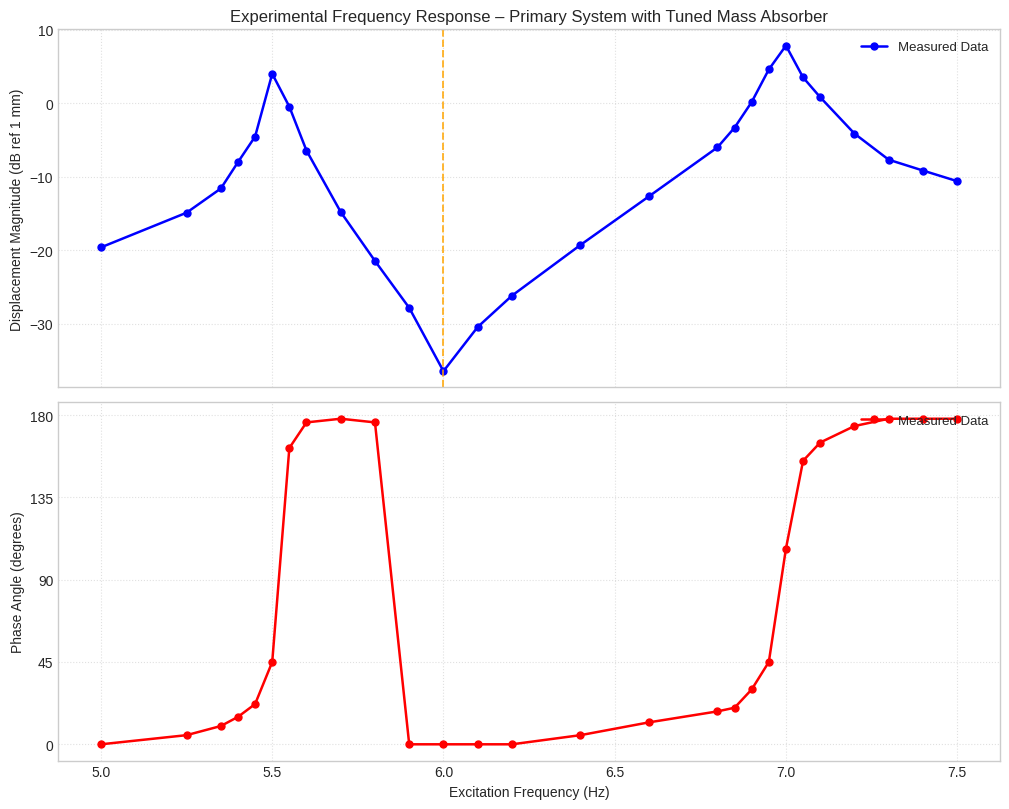

Antiresonance observed at: 6.00 Hz
  → Minimum amplitude: 0.0150 mm


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ─── Experimental Frequency Response Data ────────────────────────────────────
freq_hz = np.array([
    5.00, 5.25, 5.35, 5.40, 5.45, 5.50, 5.55, 5.60, 5.70, 5.80, 5.90,
    6.00, 6.10, 6.20, 6.40, 6.60, 6.80, 6.85, 6.90, 6.95, 7.00, 7.05,
    7.10, 7.20, 7.30, 7.40, 7.50
])

disp_mm = np.array([
    0.1045, 0.1800, 0.2630, 0.3975, 0.5935, 1.5890, 0.9485, 0.4770, 0.1820,
    0.0845, 0.0405, 0.0150, 0.0300, 0.0490, 0.1085, 0.2325, 0.5010, 0.6830,
    1.0205, 1.7000, 2.4705, 1.5010, 1.1000, 0.6220, 0.4130, 0.3485, 0.2950
])

phase_deg = np.array([
    0, 5, 10, 15, 22, 45, 162, 176, 178, 176, 0, 0, 0, 0,
    5, 12, 18, 20, 30, 45, 107, 155, 165, 174, 178, 178, 178
])

# Convert amplitude to dB (ref = 1 mm)
amp_db = 20 * np.log10(disp_mm + 1e-6)  # small offset to avoid log(0)

# ─── Plotting ────────────────────────────────────────────────────────────────
fig, (ax_mag, ax_phase) = plt.subplots(2, 1, figsize=(10.2, 8.2), sharex=True)

# Magnitude (dB)
ax_mag.plot(freq_hz, amp_db, 'bo-', lw=1.8, ms=5, label='Measured Data')
ax_mag.set_ylabel('Displacement Magnitude (dB ref 1 mm)')
ax_mag.set_title('Experimental Frequency Response – Primary System with Tuned Mass Absorber')
ax_mag.grid(True, which='both', linestyle=':', alpha=0.6)
ax_mag.legend(loc='upper right', fontsize=9.5)

# Find and mark antiresonance
min_idx = np.argmin(disp_mm)
anti_freq = freq_hz[min_idx]
ax_mag.axvline(anti_freq, color='orange', ls='--', lw=1.4, alpha=0.8,
               label=f'Antiresonance ≈ {anti_freq:.2f} Hz')

# Phase plot
ax_phase.plot(freq_hz, phase_deg, 'ro-', lw=1.8, ms=5, label='Measured Data')
ax_phase.set_xlabel('Excitation Frequency (Hz)')
ax_phase.set_ylabel('Phase Angle (degrees)')
ax_phase.set_yticks(np.arange(0, 181, 45))
ax_phase.grid(True, which='both', linestyle=':', alpha=0.6)
ax_phase.legend(loc='upper right', fontsize=9.5)

plt.tight_layout()
plt.show()

# ─── Summary Output ──────────────────────────────────────────────────────────
print(f"Antiresonance observed at: {anti_freq:.2f} Hz")
print(f"  → Minimum amplitude: {disp_mm[min_idx]:.4f} mm")